In [135]:
import cv2 as cv
import numpy as np
import pandas as pd
import tensorflow as tf
import os
import shutil
from glob import glob
import matplotlib.pyplot as plt
import xml.etree.ElementTree as xet
from sklearn.model_selection import train_test_split
import torch

In [3]:
!pip install ultralytics

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 606.8 kB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 869.4/869.4 kB 5.2 MB/s eta 0:00:0000:0100:01


In [6]:
import re

def noin_string(filename):
    match = re.search(r'(\d+)', filename)
    if match:
        return int(match.group(0))
    else:
        return 0
    

In [10]:
datset_path = '/kaggle/input/indian-vehicle-dataset'

In [63]:
labels_dict = dict(
    img_path=[], 
    xmin=[], 
    xmax=[], 
    ymin=[], 
    ymax=[], 
    img_w=[], 
    img_h=[]
)

In [64]:
label_dict

{'img_path': ['/kaggle/input/car-plate-detection/images/Cars0.png',
  '/kaggle/input/car-plate-detection/images/Cars0.png',
  '/kaggle/input/car-plate-detection/images/Cars0.png',
  '/kaggle/input/car-plate-detection/images/Cars0.png',
  '/kaggle/input/car-plate-detection/images/Cars0.png',
  '/kaggle/input/car-plate-detection/images/Cars0.png',
  '/kaggle/input/car-plate-detection/images/Cars0.png',
  '/kaggle/input/car-plate-detection/images/Cars0.png',
  '/kaggle/input/car-plate-detection/images/Cars0.png',
  '/kaggle/input/car-plate-detection/images/Cars1.png',
  '/kaggle/input/car-plate-detection/images/Cars2.png',
  '/kaggle/input/car-plate-detection/images/Cars3.png',
  '/kaggle/input/car-plate-detection/images/Cars4.png',
  '/kaggle/input/car-plate-detection/images/Cars5.png',
  '/kaggle/input/car-plate-detection/images/Cars6.png',
  '/kaggle/input/car-plate-detection/images/Cars7.png',
  '/kaggle/input/car-plate-detection/images/Cars8.png',
  '/kaggle/input/car-plate-detection

In [65]:
datset_path = '/kaggle/input/car-plate-detection'

In [66]:
xml_files = glob(f'{datset_path}/annotations/*.xml')

In [67]:
xml_files


['/kaggle/input/car-plate-detection/annotations/Cars339.xml',
 '/kaggle/input/car-plate-detection/annotations/Cars13.xml',
 '/kaggle/input/car-plate-detection/annotations/Cars74.xml',
 '/kaggle/input/car-plate-detection/annotations/Cars16.xml',
 '/kaggle/input/car-plate-detection/annotations/Cars291.xml',
 '/kaggle/input/car-plate-detection/annotations/Cars236.xml',
 '/kaggle/input/car-plate-detection/annotations/Cars429.xml',
 '/kaggle/input/car-plate-detection/annotations/Cars132.xml',
 '/kaggle/input/car-plate-detection/annotations/Cars251.xml',
 '/kaggle/input/car-plate-detection/annotations/Cars51.xml',
 '/kaggle/input/car-plate-detection/annotations/Cars165.xml',
 '/kaggle/input/car-plate-detection/annotations/Cars313.xml',
 '/kaggle/input/car-plate-detection/annotations/Cars240.xml',
 '/kaggle/input/car-plate-detection/annotations/Cars201.xml',
 '/kaggle/input/car-plate-detection/annotations/Cars412.xml',
 '/kaggle/input/car-plate-detection/annotations/Cars227.xml',
 '/kaggle/in

In [68]:
import cv2 as cv

In [73]:
label_dict = {
    'img_path': [],
    'xmin': [],
    'xmax': [],
    'ymin': [],
    'ymax': [],
    'img_w': [],
    'img_h': []
}


In [74]:

for filename in sorted(xml_files, key = noin_string):
    info = xet.parse(filename)
    root = info.getroot()
    
    member_object = root.find('object')
    label_info = member_object.find('bndbox')
    
#     print('member_object', 'label_info' )
    
    xmin = int(label_info.find('xmin').text)
    xmax = int(label_info.find('xmax').text)
    ymin = int(label_info.find('ymin').text)
    ymax = int(label_info.find('ymax').text)
    
#     print (xmin, xmax, ymin, ymax)
    
    img_name = root.find('filename').text
    img_path = os.path.join(datset_path, 'images', img_name)
    
#     print(img_name,img_path)
    
    height, width, _ = cv.imread(img_path).shape

#     print(height,width)
    
    label_dict['img_path'].append(img_path)
    label_dict['xmin'].append(xmin)
    label_dict['xmax'].append(xmax)
    label_dict['ymin'].append(ymin)
    label_dict['ymax'].append(ymax)
    label_dict['img_w'].append(width)
    label_dict['img_h'].append(height)
    
#     print(label_dict)
    
#     break

In [75]:
alldata = pd.DataFrame(label_dict)

# Display the DataFrame
alldata

,img_path,xmin,xmax,ymin,ymax,img_w,img_h
0,/kaggle/input/car-plate-detection/images/Cars0...,226,419,125,173,500,268
1,/kaggle/input/car-plate-detection/images/Cars1...,134,262,128,160,400,248
2,/kaggle/input/car-plate-detection/images/Cars2...,229,270,176,193,400,400
3,/kaggle/input/car-plate-detection/images/Cars3...,142,261,128,157,400,225
4,/kaggle/input/car-plate-detection/images/Cars4...,156,503,82,253,590,350
...,...,...,...,...,...,...,...
428,/kaggle/input/car-plate-detection/images/Cars4...,142,258,128,157,400,225
429,/kaggle/input/car-plate-detection/images/Cars4...,86,208,166,195,301,400
430,/kaggle/input/car-plate-detection/images/Cars4...,38,116,159,197,400,225
431,/kaggle/input/car-plate-detection/images/Cars4...,55,343,82,147,400,192


In [82]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(alldata, test_size= 1/10, random_state=42)
train, val = train_test_split(train, train_size = 8/9, random_state =42)

print(f'''len(train)= {len(train)}
len(val)= {len(val)}
len(test)= {len(test)}''')

len(train)= 345
len(val)= 44
len(test)= 44


In [83]:
train

,img_path,xmin,xmax,ymin,ymax,img_w,img_h
124,/kaggle/input/car-plate-detection/images/Cars1...,305,320,256,267,400,267
315,/kaggle/input/car-plate-detection/images/Cars3...,12,385,98,181,400,300
282,/kaggle/input/car-plate-detection/images/Cars2...,37,319,145,203,350,263
236,/kaggle/input/car-plate-detection/images/Cars2...,223,250,106,119,400,176
112,/kaggle/input/car-plate-detection/images/Cars1...,49,164,135,191,240,400
...,...,...,...,...,...,...,...
110,/kaggle/input/car-plate-detection/images/Cars1...,286,328,133,159,400,267
255,/kaggle/input/car-plate-detection/images/Cars2...,116,273,156,188,400,267
292,/kaggle/input/car-plate-detection/images/Cars2...,91,137,187,208,400,267
54,/kaggle/input/car-plate-detection/images/Cars5...,148,257,61,118,400,300


In [84]:
def make_split_folder_in_yolo_format(split_name, split_df):
    """
    Creates a folder structure for a dataset split (train/val/test) in YOLO format.

    Parameters:
    split_name (str): The name of the split (e.g., 'train', 'val', 'test').
    split_df (pd.DataFrame): The DataFrame containing the data for the split.

    The function will create 'labels' and 'images' subdirectories under 'datasets/cars_license_plate/{split_name}',
    and save the corresponding labels and images in YOLO format.
    """
    labels_path = os.path.join('datasets', 'cars_license_plate_new', split_name, 'labels')
    images_path = os.path.join('datasets', 'cars_license_plate_new', split_name, 'images')

    # Create directories for labels and images
    os.makedirs(labels_path)
    os.makedirs(images_path)
    
    # Iterate over each row in the DataFrame
    for _, row in split_df.iterrows():
        img_name, img_extension = os.path.splitext(os.path.basename(row['img_path']))
        
        # Calculate YOLO format bounding box coordinates
        x_center = (row['xmin'] + row['xmax']) / 2 / row['img_w']
        y_center = (row['ymin'] + row['ymax']) / 2 / row['img_h']
        width = (row['xmax'] - row['xmin']) / row['img_w']
        height = (row['ymax'] - row['ymin']) / row['img_h']

        # Save the label in YOLO format
        label_path = os.path.join(labels_path, f'{img_name}.txt')
        with open(label_path, 'w') as file:
            file.write(f"0 {x_center:.4f} {y_center:.4f} {width:.4f} {height:.4f}\n")
            
        # Copy the image to the images directory
        shutil.copy(row['img_path'], os.path.join(images_path, img_name + img_extension))
    
    print(f"Created '{images_path}' and '{labels_path}'")

In [107]:
# Create YOLO format folders for train, validation, and test splits
make_split_folder_in_yolo_format("train", train)
make_split_folder_in_yolo_format("val", val)
make_split_folder_in_yolo_format("test", test)

FileExistsError: [Errno 17] File exists: 'datasets/cars_license_plate_new/train/labels'

In [128]:
dataset_yml = '''
path: cars_license_plate_new

train: /kaggle/working/datasets/cars_license_plate_new/train
val: /kaggle/working/datasets/cars_license_plate_new/val
test: /kaggle/working/datasets/cars_license_plate_new/test

nc: 1
names: ['cars_license_plate_new']
'''

# Save to a file with a .yaml extension
with open('dataset_config.yaml', 'w') as file:
    file.write(dataset_yml)


In [131]:
from ultralytics import YOLO

In [132]:
model = YOLO('yolov8n.pt')

In [133]:
# Update the path to the YAML file
model.train(
    data='dataset_config.yaml',
    epochs=100,
    batch=16,
    imgsz=320
)


Ultralytics YOLOv8.2.81 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=dataset_config.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=320, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train11, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True

100%|██████████| 755k/755k [00:00<00:00, 13.4MB/s]
2024-08-23 10:30:18,218	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2024-08-23 10:30:18,809	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

  ········································


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks with YOLOv8n...
AMP: checks passed ✅


/opt/conda/lib/python3.10/site-packages/ultralytics/engine/trainer.py:271: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.scaler = torch.cuda.amp.GradScaler(enabled=self.amp)
train: Scanning /kaggle/working/datasets/cars_license_plate_new/train/labels... 345 images, 0 backgrounds, 0 corrupt: 100%|██████████| 345/345 [00:00<00:00, 469.12it/s]

train: New cache created: /kaggle/working/datasets/cars_license_plate_new/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /kaggle/working/datasets/cars_license_plate_new/val/labels... 44 images, 0 backgrounds, 0 corrupt: 100%|██████████| 44/44 [00:00<00:00, 454.03it/s]

val: New cache created: /kaggle/working/datasets/cars_license_plate_new/val/labels.cache


Plotting labels to runs/detect/train11/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 320 train, 320 val
Using 2 dataloader workers
Logging results to runs/detect/train11
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100     0.673G      1.803      2.996       1.38         23        320: 100%|██████████| 22/22 [00:04<00:00,  4.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.37it/s]

                   all         44         44    0.00324      0.909      0.473      0.218



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100     0.614G      1.559       1.63      1.136         17        320: 100%|██████████| 22/22 [00:02<00:00,  7.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.51it/s]

                   all         44         44    0.00431      0.909     0.0837     0.0408



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100     0.623G      1.549      1.449      1.169         17        320: 100%|██████████| 22/22 [00:02<00:00,  8.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.23it/s]

                   all         44         44      0.666      0.273      0.372      0.204



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100     0.623G      1.547      1.434      1.195         12        320: 100%|██████████| 22/22 [00:02<00:00,  7.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.30it/s]

                   all         44         44      0.355       0.25      0.244     0.0987



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100     0.623G      1.573      1.339      1.221         21        320: 100%|██████████| 22/22 [00:02<00:00,  8.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.58it/s]

                   all         44         44     0.0104      0.295    0.00919    0.00428



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100     0.623G      1.583      1.314      1.206         13        320: 100%|██████████| 22/22 [00:02<00:00,  8.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.28it/s]

                   all         44         44       0.37      0.159      0.152      0.083



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100     0.623G      1.533      1.277       1.19         18        320: 100%|██████████| 22/22 [00:02<00:00,  8.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.03it/s]

                   all         44         44      0.639      0.386      0.473      0.258



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100     0.623G      1.476      1.194      1.176         15        320: 100%|██████████| 22/22 [00:02<00:00,  8.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.48it/s]

                   all         44         44       0.78      0.726       0.75      0.378



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100     0.623G      1.503      1.131      1.178         18        320: 100%|██████████| 22/22 [00:02<00:00,  8.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.15it/s]

                   all         44         44      0.919      0.795       0.84      0.456



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100     0.623G      1.472      1.115      1.204         16        320: 100%|██████████| 22/22 [00:02<00:00,  8.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.12it/s]

                   all         44         44      0.898      0.659      0.778      0.397



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100     0.623G      1.482      1.045      1.201         16        320: 100%|██████████| 22/22 [00:02<00:00,  8.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.23it/s]

                   all         44         44      0.841      0.886      0.878      0.463



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100     0.623G      1.509      1.076       1.21         14        320: 100%|██████████| 22/22 [00:02<00:00,  8.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.68it/s]

                   all         44         44      0.809      0.818      0.847      0.389



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100     0.623G      1.446      1.061      1.144         21        320: 100%|██████████| 22/22 [00:02<00:00,  8.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.10it/s]

                   all         44         44      0.831      0.886      0.886      0.399



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100     0.623G      1.426      1.007      1.141         13        320: 100%|██████████| 22/22 [00:02<00:00,  8.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.23it/s]

                   all         44         44      0.824      0.864      0.896      0.463



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100     0.623G      1.402     0.9687      1.142         17        320: 100%|██████████| 22/22 [00:02<00:00,  8.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.42it/s]

                   all         44         44      0.887      0.795      0.846      0.444



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100     0.623G      1.448     0.9828      1.145         19        320: 100%|██████████| 22/22 [00:02<00:00,  8.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.68it/s]

                   all         44         44      0.928      0.773      0.866      0.472



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100     0.623G      1.361      0.936      1.153         18        320: 100%|██████████| 22/22 [00:02<00:00,  8.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.24it/s]

                   all         44         44      0.837      0.886      0.846      0.451



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100     0.623G      1.448     0.9439      1.142         20        320: 100%|██████████| 22/22 [00:02<00:00,  7.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.19it/s]

                   all         44         44      0.883      0.854      0.896      0.468



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100     0.623G      1.339     0.9414      1.111         21        320: 100%|██████████| 22/22 [00:02<00:00,  8.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.05it/s]

                   all         44         44      0.853      0.841      0.869      0.472



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100     0.623G      1.386     0.9045      1.147         16        320: 100%|██████████| 22/22 [00:02<00:00,  8.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.39it/s]

                   all         44         44      0.938      0.864       0.87      0.482



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100     0.623G      1.414     0.9205      1.139         21        320: 100%|██████████| 22/22 [00:02<00:00,  8.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.73it/s]

                   all         44         44      0.882      0.854      0.862      0.458



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100     0.623G      1.332     0.8533      1.095         19        320: 100%|██████████| 22/22 [00:02<00:00,  8.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.50it/s]

                   all         44         44       0.84      0.836      0.868      0.437



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100     0.623G      1.406     0.9022      1.156         24        320: 100%|██████████| 22/22 [00:02<00:00,  8.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.21it/s]

                   all         44         44      0.821      0.886      0.881      0.462



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100     0.621G      1.427     0.8882      1.142         10        320: 100%|██████████| 22/22 [00:02<00:00,  8.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.73it/s]

                   all         44         44      0.871      0.841      0.845      0.465



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100     0.623G       1.34      0.829      1.103         12        320: 100%|██████████| 22/22 [00:02<00:00,  8.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.44it/s]

                   all         44         44      0.882      0.849      0.847      0.496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100     0.623G      1.338     0.8318      1.113         13        320: 100%|██████████| 22/22 [00:02<00:00,  8.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.97it/s]

                   all         44         44      0.901      0.841      0.873      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100     0.623G      1.283     0.8047      1.092         16        320: 100%|██████████| 22/22 [00:02<00:00,  8.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.60it/s]

                   all         44         44       0.81      0.909      0.892      0.478



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100     0.623G      1.383     0.8158      1.131         18        320: 100%|██████████| 22/22 [00:02<00:00,  8.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.35it/s]

                   all         44         44      0.804      0.839      0.856      0.445



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100     0.621G      1.346     0.8137       1.12         14        320: 100%|██████████| 22/22 [00:02<00:00,  8.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.57it/s]

                   all         44         44       0.85      0.909       0.89      0.445



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100     0.623G      1.319     0.7922      1.104         16        320: 100%|██████████| 22/22 [00:02<00:00,  8.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.63it/s]

                   all         44         44      0.865      0.841      0.841      0.467



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100     0.623G      1.301     0.8083      1.102         22        320: 100%|██████████| 22/22 [00:02<00:00,  8.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.51it/s]

                   all         44         44      0.866      0.886      0.888      0.491



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100     0.623G      1.286     0.7996      1.092         20        320: 100%|██████████| 22/22 [00:02<00:00,  8.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.82it/s]

                   all         44         44      0.883      0.864      0.896      0.485



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100     0.623G      1.201     0.7706      1.065         17        320: 100%|██████████| 22/22 [00:02<00:00,  8.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.45it/s]

                   all         44         44      0.877      0.818      0.878      0.495



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100     0.623G      1.248     0.7753      1.068         18        320: 100%|██████████| 22/22 [00:02<00:00,  8.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.59it/s]

                   all         44         44      0.828      0.886      0.879      0.487



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100     0.623G      1.307     0.7992      1.107         11        320: 100%|██████████| 22/22 [00:02<00:00,  8.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.80it/s]

                   all         44         44      0.906       0.88      0.888      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100     0.623G      1.261     0.7455      1.074         13        320: 100%|██████████| 22/22 [00:02<00:00,  8.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.16it/s]

                   all         44         44      0.878      0.886      0.906      0.553



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100     0.623G      1.237     0.7275       1.07         20        320: 100%|██████████| 22/22 [00:02<00:00,  8.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.09it/s]

                   all         44         44        0.9      0.864      0.889      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100     0.623G      1.325     0.7953      1.112         13        320: 100%|██████████| 22/22 [00:02<00:00,  8.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.68it/s]

                   all         44         44      0.935      0.841      0.914      0.477



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100     0.623G      1.258     0.7767      1.096         18        320: 100%|██████████| 22/22 [00:02<00:00,  8.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.84it/s]

                   all         44         44      0.898      0.864      0.922      0.488



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100     0.623G      1.257     0.7544      1.068         18        320: 100%|██████████| 22/22 [00:02<00:00,  8.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.75it/s]

                   all         44         44      0.925      0.837      0.905      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100     0.623G      1.221     0.7498       1.06         13        320: 100%|██████████| 22/22 [00:02<00:00,  8.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.21it/s]

                   all         44         44        0.9      0.841       0.89      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100     0.623G      1.221     0.7386      1.068         17        320: 100%|██████████| 22/22 [00:02<00:00,  8.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.71it/s]

                   all         44         44      0.924      0.864      0.935      0.534



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100     0.623G      1.208      0.725      1.067         20        320: 100%|██████████| 22/22 [00:02<00:00,  8.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.40it/s]

                   all         44         44      0.865      0.876      0.894      0.476



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100     0.623G      1.267     0.7363      1.078         16        320: 100%|██████████| 22/22 [00:02<00:00,  7.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.31it/s]

                   all         44         44      0.946      0.864      0.936      0.496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100     0.623G      1.248      0.719      1.067         13        320: 100%|██████████| 22/22 [00:02<00:00,  8.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.19it/s]

                   all         44         44      0.948      0.886      0.935      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100     0.623G      1.205     0.6986      1.058         19        320: 100%|██████████| 22/22 [00:02<00:00,  8.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.00it/s]

                   all         44         44      0.906      0.873       0.91      0.504



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100     0.623G      1.184     0.6984      1.061         16        320: 100%|██████████| 22/22 [00:02<00:00,  8.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.38it/s]

                   all         44         44      0.918      0.841       0.91      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100     0.623G      1.161     0.6707      1.061         22        320: 100%|██████████| 22/22 [00:02<00:00,  8.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.76it/s]

                   all         44         44      0.877      0.886      0.899       0.49



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100     0.623G      1.205      0.708      1.062         21        320: 100%|██████████| 22/22 [00:02<00:00,  8.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.33it/s]

                   all         44         44      0.867      0.886      0.893      0.492



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100     0.623G      1.143     0.6662      1.036         14        320: 100%|██████████| 22/22 [00:02<00:00,  8.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.38it/s]

                   all         44         44      0.846      0.886      0.892      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100     0.623G      1.111     0.6367      1.027         22        320: 100%|██████████| 22/22 [00:02<00:00,  8.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.79it/s]

                   all         44         44      0.903      0.886      0.924      0.538



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100     0.623G      1.155     0.6743       1.03         13        320: 100%|██████████| 22/22 [00:02<00:00,  8.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.33it/s]

                   all         44         44      0.889      0.906      0.928      0.501



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100     0.623G      1.162     0.6578      1.035         19        320: 100%|██████████| 22/22 [00:02<00:00,  8.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.95it/s]

                   all         44         44      0.905      0.864      0.928      0.483



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100     0.623G      1.184     0.6804      1.071         14        320: 100%|██████████| 22/22 [00:02<00:00,  8.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.02it/s]

                   all         44         44      0.848      0.909      0.936      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100     0.623G      1.164     0.6695      1.034         16        320: 100%|██████████| 22/22 [00:02<00:00,  8.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.33it/s]

                   all         44         44      0.864      0.886      0.898      0.494



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100     0.623G      1.145     0.6474      1.035         17        320: 100%|██████████| 22/22 [00:02<00:00,  7.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.54it/s]

                   all         44         44      0.866       0.88      0.877      0.529



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100     0.623G      1.076     0.6582     0.9989         22        320: 100%|██████████| 22/22 [00:02<00:00,  8.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.31it/s]

                   all         44         44      0.862      0.864      0.907      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100     0.623G      1.118     0.6416       1.04         18        320: 100%|██████████| 22/22 [00:02<00:00,  8.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.21it/s]

                   all         44         44      0.881      0.864      0.897      0.503



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100     0.623G      1.138     0.6576      1.033         14        320: 100%|██████████| 22/22 [00:02<00:00,  8.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.13it/s]

                   all         44         44      0.847       0.88      0.889      0.505



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100     0.623G      1.112     0.6465      1.021         18        320: 100%|██████████| 22/22 [00:02<00:00,  8.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.61it/s]

                   all         44         44      0.862      0.886      0.899      0.527



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100     0.623G      1.098     0.6331      1.031         23        320: 100%|██████████| 22/22 [00:02<00:00,  8.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.02it/s]

                   all         44         44      0.888      0.897      0.925      0.527



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100     0.623G      1.121     0.6356      1.034         19        320: 100%|██████████| 22/22 [00:02<00:00,  8.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.28it/s]

                   all         44         44      0.889      0.907      0.939      0.543



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100     0.623G       1.15     0.6395      1.023         15        320: 100%|██████████| 22/22 [00:02<00:00,  8.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.07it/s]

                   all         44         44      0.914      0.841      0.884      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100     0.623G      1.126     0.6362      1.018         20        320: 100%|██████████| 22/22 [00:02<00:00,  8.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.97it/s]

                   all         44         44      0.904      0.859      0.897      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100     0.623G      1.088     0.6097      1.022         18        320: 100%|██████████| 22/22 [00:02<00:00,  8.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.65it/s]

                   all         44         44      0.927      0.886      0.891       0.52



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100     0.623G       1.08     0.6192      1.032         20        320: 100%|██████████| 22/22 [00:02<00:00,  7.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.07it/s]

                   all         44         44      0.945      0.841      0.888      0.503



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100     0.621G      1.107     0.6382      1.036         13        320: 100%|██████████| 22/22 [00:02<00:00,  8.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.61it/s]

                   all         44         44      0.902      0.864      0.886      0.506



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100     0.623G      1.064     0.5958          1         14        320: 100%|██████████| 22/22 [00:02<00:00,  8.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.79it/s]

                   all         44         44      0.886      0.887      0.913       0.54



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100     0.621G      1.044      0.589     0.9929         16        320: 100%|██████████| 22/22 [00:02<00:00,  8.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.77it/s]

                   all         44         44      0.865      0.886      0.921      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100     0.621G      1.049     0.5861      1.006         10        320: 100%|██████████| 22/22 [00:02<00:00,  8.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.74it/s]

                   all         44         44      0.872       0.93      0.935      0.551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100     0.623G      1.044     0.6128     0.9974         22        320: 100%|██████████| 22/22 [00:02<00:00,  8.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.35it/s]

                   all         44         44      0.869      0.909      0.919      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100     0.623G      1.038     0.6067      1.022         13        320: 100%|██████████| 22/22 [00:02<00:00,  8.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.45it/s]

                   all         44         44      0.887      0.909      0.907      0.532



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100     0.623G      1.028     0.5958     0.9958         16        320: 100%|██████████| 22/22 [00:02<00:00,  8.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.40it/s]

                   all         44         44      0.885      0.878      0.877      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100     0.623G      1.048     0.6154     0.9788         14        320: 100%|██████████| 22/22 [00:02<00:00,  8.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.45it/s]

                   all         44         44      0.847      0.841      0.855      0.524



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100     0.621G      1.022     0.5841      0.989         12        320: 100%|██████████| 22/22 [00:02<00:00,  8.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.83it/s]

                   all         44         44      0.862      0.864      0.879      0.535



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100     0.623G      1.067     0.5778      1.007         16        320: 100%|██████████| 22/22 [00:02<00:00,  8.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.91it/s]

                   all         44         44       0.86      0.886      0.903      0.539



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100     0.623G     0.9816      0.575     0.9886         16        320: 100%|██████████| 22/22 [00:02<00:00,  8.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.02it/s]

                   all         44         44      0.872      0.927      0.925      0.551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100     0.621G       1.04     0.5621      1.014         13        320: 100%|██████████| 22/22 [00:02<00:00,  8.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.25it/s]

                   all         44         44      0.907      0.882      0.923      0.552



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100     0.623G      1.041     0.5667      1.001         14        320: 100%|██████████| 22/22 [00:02<00:00,  8.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.96it/s]

                   all         44         44      0.907      0.882      0.911      0.542



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100     0.623G      1.031     0.5715     0.9993         15        320: 100%|██████████| 22/22 [00:02<00:00,  8.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.73it/s]

                   all         44         44      0.833      0.904      0.897      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100     0.623G      0.968     0.5726     0.9891         23        320: 100%|██████████| 22/22 [00:02<00:00,  8.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.96it/s]

                   all         44         44       0.88      0.886      0.924      0.531



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100     0.623G     0.9951     0.5454     0.9783         18        320: 100%|██████████| 22/22 [00:02<00:00,  8.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.95it/s]

                   all         44         44      0.885      0.873      0.904      0.534



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100     0.623G     0.9825     0.5538     0.9936         16        320: 100%|██████████| 22/22 [00:02<00:00,  8.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.79it/s]

                   all         44         44      0.928      0.864      0.918      0.531



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100     0.623G     0.9661     0.5559     0.9867         25        320: 100%|██████████| 22/22 [00:02<00:00,  8.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.87it/s]

                   all         44         44      0.867      0.864      0.888      0.529



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100     0.623G     0.9328     0.5273     0.9525         19        320: 100%|██████████| 22/22 [00:02<00:00,  8.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.25it/s]

                   all         44         44      0.888      0.905      0.911      0.544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100     0.623G      1.016     0.5679     0.9958         18        320: 100%|██████████| 22/22 [00:02<00:00,  8.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.83it/s]

                   all         44         44      0.885      0.909      0.919      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100     0.623G      1.011      0.563     0.9801         17        320: 100%|██████████| 22/22 [00:02<00:00,  8.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.56it/s]

                   all         44         44      0.864      0.886      0.878      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100     0.623G     0.9502     0.5425     0.9624         17        320: 100%|██████████| 22/22 [00:02<00:00,  8.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.15it/s]

                   all         44         44      0.863      0.886      0.873      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100     0.623G      1.008      0.562     0.9973         17        320: 100%|██████████| 22/22 [00:02<00:00,  8.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.45it/s]

                   all         44         44       0.86      0.886      0.874      0.537



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100     0.621G     0.9895     0.5356      0.983         15        320: 100%|██████████| 22/22 [00:02<00:00,  7.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.15it/s]

                   all         44         44       0.92      0.841      0.882      0.533


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100     0.621G     0.9518     0.5295     0.9742          9        320: 100%|██████████| 22/22 [00:03<00:00,  6.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.08it/s]

                   all         44         44      0.884      0.909      0.903      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100     0.623G     0.9541     0.5195     0.9783          9        320: 100%|██████████| 22/22 [00:02<00:00,  9.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.78it/s]

                   all         44         44      0.973      0.833      0.887       0.52



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100     0.621G     0.9567     0.5066     0.9777          9        320: 100%|██████████| 22/22 [00:02<00:00,  8.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.78it/s]

                   all         44         44      0.909      0.907      0.922      0.541



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100     0.621G     0.9634      0.497      0.984          9        320: 100%|██████████| 22/22 [00:02<00:00,  8.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.68it/s]

                   all         44         44      0.924      0.909      0.926      0.541



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100     0.621G     0.9157     0.4892     0.9765          9        320: 100%|██████████| 22/22 [00:02<00:00,  8.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.45it/s]

                   all         44         44      0.916      0.909      0.924      0.534



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100     0.621G     0.9256     0.4945     0.9623          9        320: 100%|██████████| 22/22 [00:02<00:00,  8.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.98it/s]

                   all         44         44      0.907      0.909      0.925      0.534



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100     0.621G     0.8749     0.4811       0.95          9        320: 100%|██████████| 22/22 [00:02<00:00,  8.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.42it/s]

                   all         44         44      0.917      0.909      0.921      0.542



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100     0.621G     0.9207       0.49     0.9506          9        320: 100%|██████████| 22/22 [00:02<00:00,  7.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.04it/s]

                   all         44         44      0.925      0.909      0.927      0.543



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100     0.621G     0.9021     0.4711     0.9562          9        320: 100%|██████████| 22/22 [00:02<00:00,  8.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.02it/s]

                   all         44         44      0.899      0.909      0.925      0.549



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100     0.621G      0.905     0.4774     0.9507          9        320: 100%|██████████| 22/22 [00:02<00:00,  8.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.64it/s]

                   all         44         44        0.9      0.909      0.927      0.558



100 epochs completed in 0.113 hours.
Optimizer stripped from runs/detect/train11/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train11/weights/best.pt, 6.2MB

Validating runs/detect/train11/weights/best.pt...
Ultralytics YOLOv8.2.81 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.96it/s]


                   all         44         44      0.884      0.886      0.925      0.563
Speed: 0.1ms preprocess, 0.9ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to runs/detect/train11


lr/pg0,▂▆███▇▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▄▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▁▁▁
lr/pg1,▂▆███▇▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▄▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▁▁▁
lr/pg2,▂▆███▇▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▄▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▁▁▁
metrics/mAP50(B),▄▃▁▆▇█▇█▇█▇▇█▇████████▇██████▇████▇▇████
metrics/mAP50-95(B),▃▃▁▅▇▆▇▇▆▇▇▆▇▇█▇▇▇▇▇█▇▇▇▇▇▇██▇███▇▇█▇███
metrics/precision(B),▁▆▄▇▇▇█▇▇▇▇▇▇▇▇▇▇██▇▇▇▇▇▇█▇▇▇▇▇█▇▇▇▇███▇
metrics/recall(B),█▂▁▆██▇▇▇█▇▇███▇▇▇███████▇▇██▇███▇██▇███
model/GFLOPs,▁
model/parameters,▁
model/speed_PyTorch(ms),▁
train/box_loss,█▆▆▆▆▅▅▅▅▅▄▅▄▄▄▄▄▄▃▃▃▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▁▁


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x786c98d2c100>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [143]:
log_dir = max(glob('/kaggle/working/runs/detect/train*'), key = noin_string)
results = pd.read_csv(os.path.join(log_dir,'results.csv'))


In [144]:
results

,epoch,train/box_loss,train/cls_loss,train/dfl_loss,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),val/box_loss,val/cls_loss,val/dfl_loss,lr/pg0,lr/pg1,lr/pg2
0,1,1.80320,2.99620,1.37970,0.00324,0.90909,0.47299,0.21807,1.5778,2.95220,1.1631,0.000420,0.000420,0.000420
1,2,1.55890,1.63050,1.13640,0.00431,0.90909,0.08374,0.04079,1.6485,3.11250,1.2204,0.000851,0.000851,0.000851
2,3,1.54940,1.44870,1.16860,0.66563,0.27273,0.37196,0.20382,1.7001,2.69430,1.2647,0.001274,0.001274,0.001274
3,4,1.54700,1.43390,1.19470,0.35474,0.24990,0.24443,0.09872,1.8171,2.71850,1.3711,0.001688,0.001688,0.001688
4,5,1.57290,1.33880,1.22080,0.01038,0.29545,0.00919,0.00428,1.8584,17.26600,1.3946,0.001921,0.001921,0.001921
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,0.92558,0.49445,0.96230,0.90746,0.90909,0.92519,0.53358,1.5107,0.66224,1.2365,0.000119,0.000119,0.000119
96,97,0.87490,0.48111,0.95005,0.91664,0.90909,0.92091,0.54240,1.5135,0.64825,1.2388,0.000099,0.000099,0.000099
97,98,0.92066,0.49001,0.95056,0.92461,0.90909,0.92740,0.54268,1.4993,0.64579,1.2373,0.000079,0.000079,0.000079
98,99,0.90209,0.47108,0.95622,0.89887,0.90909,0.92476,0.54913,1.4875,0.66306,1.2268,0.000060,0.000060,0.000060


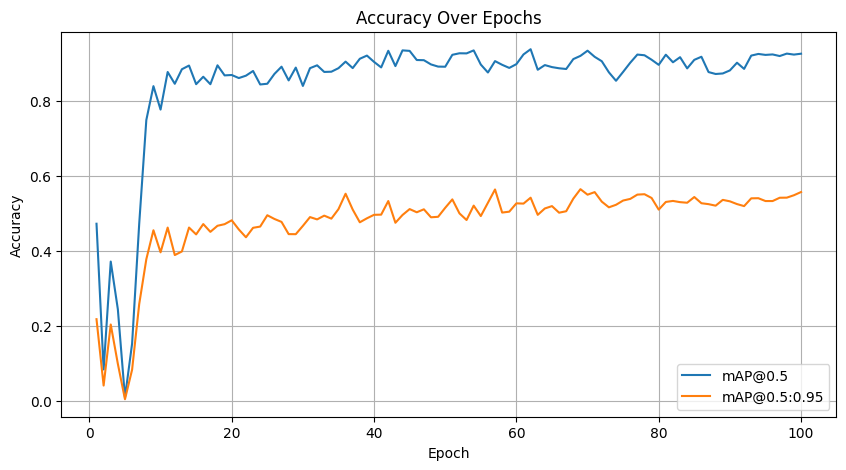

In [146]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob


# Find the most recent training log directory
log_dir = max(glob('runs/detect/train*'), key=noin_string)

# Load the training results from the CSV file
results = pd.read_csv(os.path.join(log_dir, 'results.csv'))
results.columns = results.columns.str.strip()  # Remove any leading/trailing whitespace from column names

# Extract epochs and accuracy metrics
epochs = results.index + 1  # Epochs are zero-indexed, so add 1
mAP_0_5 = results['metrics/mAP50(B)']  # Mean Average Precision at IoU=0.5
mAP_0_5_0_95 = results['metrics/mAP50-95(B)']  # Mean Average Precision at IoU=0.5:0.95

# Plot the accuracy over epochs
plt.figure(figsize=(10, 5))
plt.plot(epochs, mAP_0_5, label='mAP@0.5')
plt.plot(epochs, mAP_0_5_0_95, label='mAP@0.5:0.95')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy Over Epochs')
plt.legend()
plt.grid(True)
plt.show()

In [147]:
model.save('best_license_plate_model.pt')

In [148]:
result = model.predict("/kaggle/input/car-plate-detection/images/Cars102.png")


image 1/1 /kaggle/input/car-plate-detection/images/Cars102.png: 256x320 1 cars_license_plate_new, 38.9ms
Speed: 1.3ms preprocess, 38.9ms inference, 1.8ms postprocess per image at shape (1, 3, 256, 320)


In [149]:
result

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'cars_license_plate_new'}
 obb: None
 orig_img: array([[[47, 44, 30],
         [46, 43, 29],
         [46, 45, 31],
         ...,
         [30, 36, 31],
         [28, 34, 29],
         [27, 33, 28]],
 
        [[47, 44, 30],
         [46, 42, 31],
         [46, 45, 31],
         ...,
         [28, 34, 29],
         [27, 33, 28],
         [27, 33, 28]],
 
        [[45, 43, 32],
         [44, 42, 32],
         [47, 45, 34],
         ...,
         [28, 34, 29],
         [28, 34, 29],
         [27, 33, 28]],
 
        ...,
 
        [[ 9, 14, 12],
         [ 9, 14, 12],
         [ 8, 15, 12],
         ...,
         [ 3, 32,  6],
         [ 2, 31,  6],
         [ 1, 30,  5]],
 
        [[ 8, 13, 11],
         [ 8, 13, 11],
         [ 7, 13, 12],
         ...,
         [ 8, 37, 12],
         [ 7, 35, 12],
         [ 5, 30,  8]],
 
        [[ 

In [151]:
import cv2
import matplotlib.pyplot as plt
from ultralytics import YOLO


def predict_and_plot(path_test_car):
    """
    Predicts and plots the bounding boxes on the given test image using the trained YOLO model.

    Parameters:
    path_test_car (str): Path to the test image file.
    """
    results = model.predict(path_test_car, device='cpu')

    
    image = cv2.imread(path_test_car)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    for result in results:
        for box in result.boxes:
            x1, y1, x2, y2 = map(int, box.xyxy[0])
            confidence = box.conf[0]

            cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)
            cv2.putText(image, f'{confidence*100:.2f}%', (x1, y1 - 10), 
                        cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)


    plt.imshow(image)
    plt.axis('off')  
    plt.show()  


image 1/1 /kaggle/input/car-plate-detection/images/Cars70.png: 192x320 3 cars_license_plate_news, 37.6ms
Speed: 0.9ms preprocess, 37.6ms inference, 1.4ms postprocess per image at shape (1, 3, 192, 320)


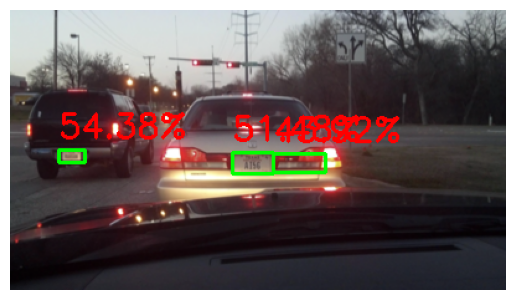

In [164]:
predict_and_plot(test.iloc[11].img_path)

In [165]:
!pip3 install pytesseract

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


In [ ]:
import pytesseract
from pytesseract import Output

In [166]:
import cv2
import matplotlib.pyplot as plt
from ultralytics import YOLO
import pytesseract
from pytesseract import Output


def predict_and_plot(path_test_car):
    """
    Predicts and plots the bounding boxes on the given test image using the trained YOLO model.
    Also performs OCR on the detected bounding boxes to extract text.
    
    Parameters:
    path_test_car (str): Path to the test image file.
    """

    results = model.predict(path_test_car, device='cpu')


    image = cv2.imread(path_test_car)

    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


    for result in results:
        for box in result.boxes:

            x1, y1, x2, y2 = map(int, box.xyxy[0])
            
            confidence = box.conf[0]


            cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)
            
            cv2.putText(image, f'{confidence*100:.2f}%', (x1, y1 - 10), 
                        cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)

            
            roi = image[y1:y2, x1:x2]

            # Perform OCR on the cropped image
            text = pytesseract.image_to_string(roi, config='--psm 6')
            print(f"Detected text: {text}")


    plt.imshow(image)
    plt.axis('off')  
    plt.show()  


image 1/1 /kaggle/input/car-plate-detection/images/Cars152.png: 224x320 1 cars_license_plate_new, 8.6ms
Speed: 1.1ms preprocess, 8.6ms inference, 1.5ms postprocess per image at shape (1, 3, 224, 320)
Detected text: * DL49 AK49.



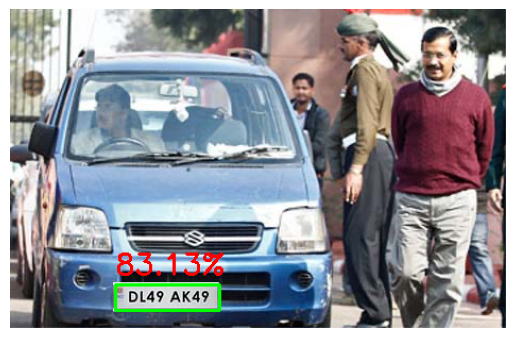

In [173]:
predict_and_plot(test.iloc[10].img_path)